In [1]:
import nc_time_axis
import warnings

import xarray as xr
import numpy as np
import pandas as pd
from importlib import reload
import string


import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec 
from matplotlib.axes import Axes
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

import os
import sys

from numpy.typing import ArrayLike
from typing import Optional, Callable, List, Tuple, Dict

warnings.filterwarnings('ignore')

In [4]:
sys.path.append('../')
import constants
sys.path.append(constants.MODULE_DIR)
import sn_plotting as sn_plot
import xarray_class_accessors as xca
import utils

import xarray_extender as xce
import signal_to_noise as sn
import open_ds
from classes import ExperimentTypes, LocationsLatLon

logger = utils.get_notebook_logger()

In [10]:
experiment_params = constants.EXPERIMENTS_TO_RUN[0]
experiment_params

{'variable': 'tas', 'mask': None, 'hemisphere': 'global'}

In [11]:
control_abrupt_ds = open_ds.open_experiment_files(experiment_params, ExperimentTypes.CONTROL)
abrupt4x_ds = open_ds.open_experiment_files(experiment_params, ExperimentTypes.ABRUPT4X)

- Removing first 10 steps


# Polynomial Detrend

In [199]:
order = 2


In [200]:
np.random.random(12)

array([0.56631685, 0.54249513, 0.55011905, 0.96299076, 0.57615356,
       0.83812957, 0.03365212, 0.07628928, 0.97206216, 0.48660708,
       0.85080901, 0.20213829])

In [201]:
x = np.arange(1, 12) ** 3
x = x + np.random.rand(len(x)) * 100

In [202]:
x = np.array([1, 2, 3, 6, 21, 55, 102])

In [203]:
y = 2 * x ** 12 + 3 * x + 20

In [239]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])

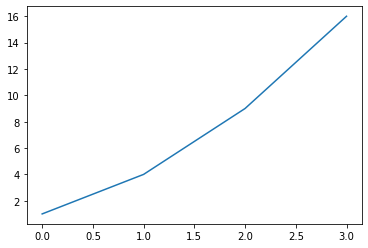

In [240]:
plt.plot(y)

In [274]:
def poly_fit_statsmodel(y, x=None, order=2):
    
    
    nobs = y.shape[0]
    x = np.arange(float(nobs)) if x is None else x
    print(x)

    trends = np.vander(x, N=order + 1)

    beta = np.linalg.pinv(trends).dot(y)
    print(beta)

    fitted_line = np.dot(trends, beta)
    
    return fitted_line

In [282]:
order = 4

In [286]:
x = np.array([1, 2, 3, 3.5, 4, 4.1, 4.2, 4.3, 9, 20, 29])
y = x ** order + x + 6
y

array([8.000000e+00, 2.400000e+01, 9.000000e+01, 1.595625e+02,
       2.660000e+02, 2.926761e+02, 3.213696e+02, 3.521801e+02,
       6.576000e+03, 1.600260e+05, 7.073160e+05])

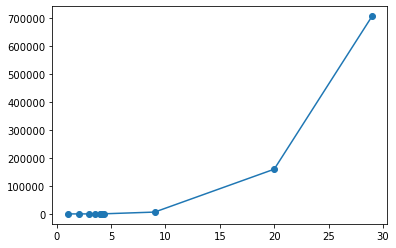

In [288]:
plt.plot(x, y, marker='o')

In [289]:
fiited_line_with_x = poly_fit_statsmodel(y=y, x=x, order=order)

[ 1.   2.   3.   3.5  4.   4.1  4.2  4.3  9.  20.  29. ]
[ 1.00000000e+00  1.36424205e-12 -2.59205990e-11  1.00000000e+00
  6.00000000e+00]


In [297]:
fiited_line_auto_x = poly_fit_statsmodel(y=y, order=order)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[    946.16602343  -15016.69058881   73135.41948427 -109573.90966503
   18284.13437483]


In [298]:
fiited_line_with_x

array([8.000000e+00, 2.400000e+01, 9.000000e+01, 1.595625e+02,
       2.660000e+02, 2.926761e+02, 3.213696e+02, 3.521801e+02,
       6.576000e+03, 1.600260e+05, 7.073160e+05])

In [299]:
fiited_line_auto_x

array([ 18284.13437483, -32224.88037133, -13316.87535385,  18969.98273776,
        31305.51177623,  13067.51419651, -23658.22300419, -44077.92826642,
         9310.15453147, 216715.76607342, 681056.63160558])

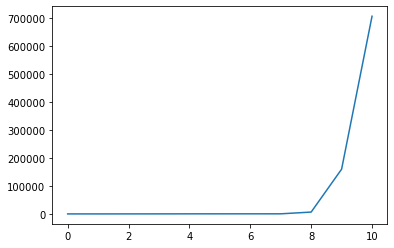

In [308]:
plt.plot(y)

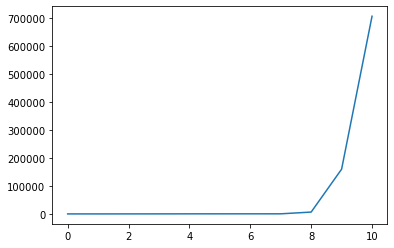

In [307]:
plt.plot(fiited_line_with_x)

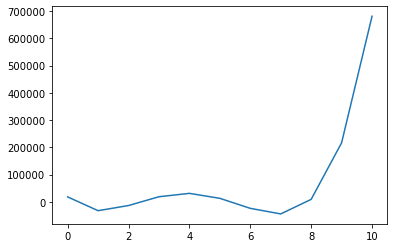

In [306]:
plt.plot(fiited_line_auto_x)

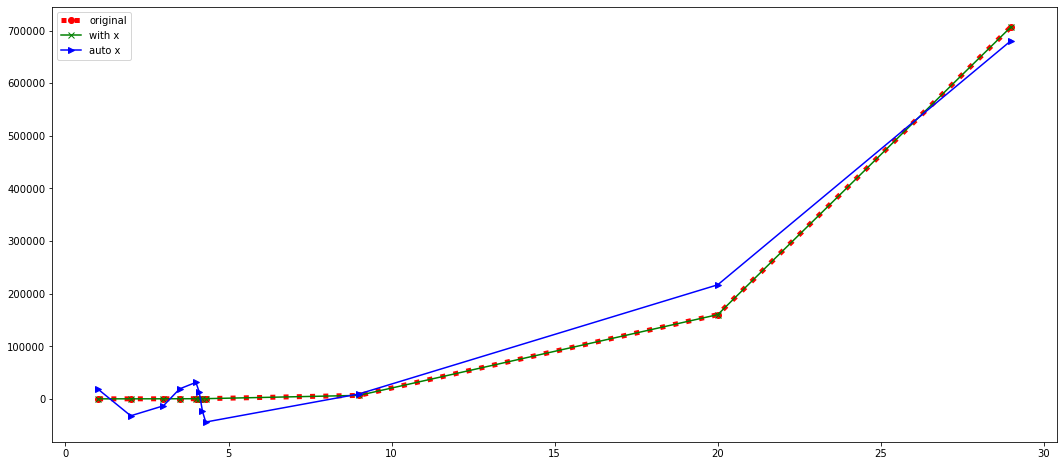

In [305]:
fig = plt.figure(figsize=(18, 8))
plt.plot(x, y, label='original', linestyle=':', marker='o', linewidth=5, color='red')
plt.plot(x, fiited_line_with_x, label='with x', marker='x', color='green')
plt.plot(x, fiited_line_auto_x, label='auto x', marker='>', color='blue')
plt.legend()